In [36]:
from keras.models import load_model
from skimage.io import imread

import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
image_path = 'image_data/test_v2/' # path to images
model_path = 'U-Net.h5' # path to model
# weight_path = 'seg_model_weights_failed.hdf5'
weight_path = 'checkpoints/seg_model_weights_2.hdf5'
normalize = 1/255.0 # normalize the image to a pixel value [0, 1]
BATCH_SIZE = 10 # number of images for prediction per iteration
image_shape = (768, 768)

os.environ["CUDA_VISIBLE_DEVICES"]="1";

In [38]:
model = load_model(model_path) # loading model
model.load_weights('model_weights.h5')

In [39]:
def prepare_to_forward(img_path):
    batch = np.zeros((BATCH_SIZE, image_shape[0], image_shape[1], 3))
    images = os.listdir(img_path)
    test_images = np.random.choice(images, BATCH_SIZE)
    for i, image in enumerate(test_images):
        img = os.path.join(img_path, image)
        img = imread(img)
        if img.shape == batch[0].shape:
            batch[i, ...] = img
        
    return batch/255.0

In [40]:
x = prepare_to_forward(image_path)

In [41]:
y = model.predict(x)

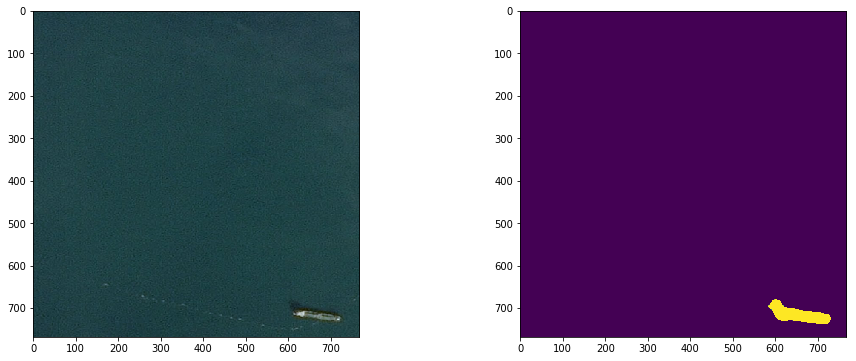

In [42]:
idx = 1

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6), sharex=True)
y1 = y[:,:,:,0][idx]

ax1.imshow(x[idx])
ax2.imshow(y1)